In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('../../train.csv')
df_result = pd.read_csv('Base620ValidationResult.csv', skiprows = 0, delimiter=" |,")
df_result.columns = ['row_id', 'prediction1', 'prediction2','prediction3']

C:\Users\Kuangwei\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


In [3]:
joined_df = pd.merge(df_train, df_result, how='left', on='row_id')

In [4]:
joined_df

,row_id,x,y,accuracy,time,place_id,prediction1,prediction2,prediction3
0,0,0.7941,9.0809,54,470702,8523065625,NaN,NaN,NaN
1,1,5.9567,4.7968,13,186555,1757726713,NaN,NaN,NaN
2,2,8.3078,7.0407,74,322648,1137537235,NaN,NaN,NaN
3,3,7.3665,2.5165,65,704587,6567393236,4505710601,5413763333,2465239230
4,4,4.0961,1.1307,31,472130,7440663949,NaN,NaN,NaN
5,5,3.8099,1.9586,75,178065,6289802927,NaN,NaN,NaN
6,6,6.3336,4.3720,13,666829,9931249544,NaN,NaN,NaN
7,7,5.7409,6.7697,85,369002,5662813655,NaN,NaN,NaN
8,8,4.3114,6.9410,3,166384,8471780938,NaN,NaN,NaN
9,9,6.3414,0.0758,65,400060,1253803156,NaN,NaN,NaN


In [9]:
wrong_predictions = joined_df[((joined_df.place_id != joined_df.prediction1) | \
          (joined_df.place_id != joined_df.prediction2) | \
          (joined_df.place_id != joined_df.prediction3)) &
         ~np.isnan(joined_df.prediction1)]

In [17]:
right_predictions = joined_df[((joined_df.place_id == joined_df.prediction1) | \
          (joined_df.place_id == joined_df.prediction2) | \
          (joined_df.place_id == joined_df.prediction3))]

In [15]:
wrong_predictions.columns

Index(['row_id', 'x', 'y', 'accuracy', 'time', 'place_id', 'prediction1',
       'prediction2', 'prediction3'],
      dtype='object')

In [12]:
wrong_predictions.x.describe()

count    4417684.000000
mean           4.997728
std            2.861145
min            0.000000
25%            2.527800
50%            5.010400
75%            7.457700
max           10.000000
Name: x, dtype: float64

In [13]:
wrong_predictions.y.describe()

count    4417684.000000
mean           5.007427
std            2.890049
min            0.000000
25%            2.496500
50%            4.999050
75%            7.512200
max           10.000000
Name: y, dtype: float64

In [16]:
wrong_predictions.accuracy.describe()

count    4417684.000000
mean          92.255216
std          124.486725
min            1.000000
25%           39.000000
50%           64.000000
75%           80.000000
max         1022.000000
Name: accuracy, dtype: float64

In [18]:
right_predictions.accuracy.describe()

count    2868744.000000
mean          86.077070
std          101.942785
min            1.000000
25%           48.000000
50%           65.000000
75%           77.000000
max         1022.000000
Name: accuracy, dtype: float64

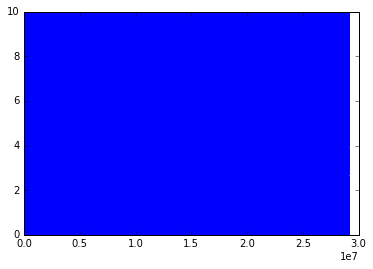

In [28]:
k = wrong_predictions.x.copy()
k.sort_values(inplace=True)
plt.plot(k)